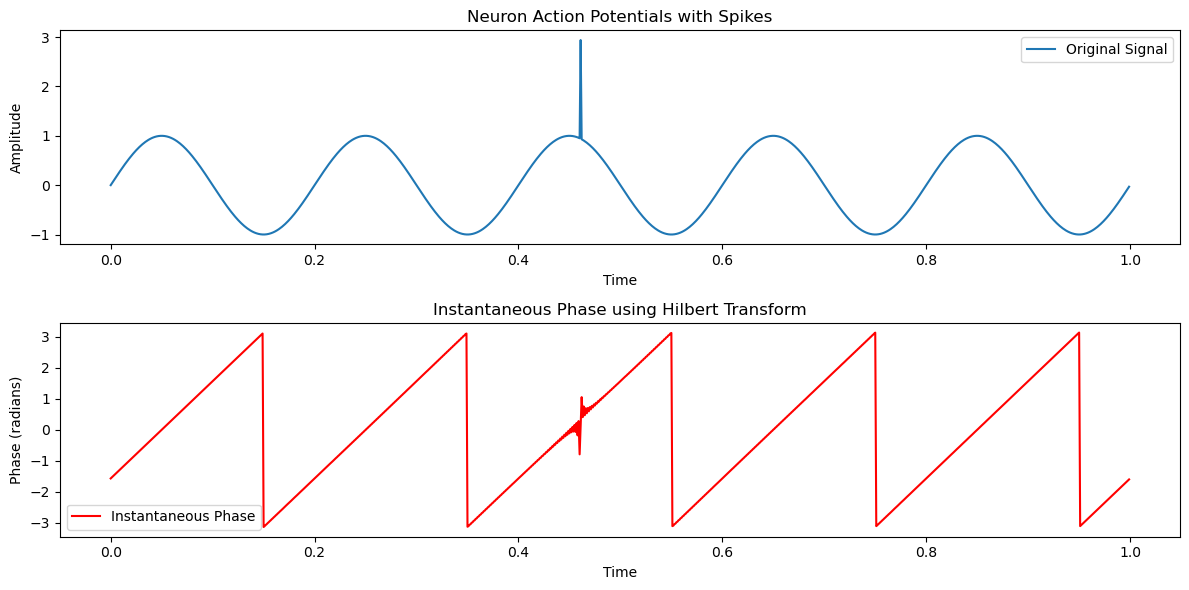

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Function to generate a signal with neuron action potentials
def generate_spiking_signal(t, spike_rate=10, spike_amplitude=1):
    base_signal = np.sin(2 * np.pi * 5 * t)  # Simple sinusoidal signal as a base
    spikes = np.zeros_like(t)

    # Generate random spike times
    spike_times = np.random.choice(len(t), size=int(len(t) * spike_rate / 1000), replace=False)

    # Add spikes at random times with a stereotypical spike waveform
    spikes[spike_times] = spike_amplitude * np.exp(-((t[spike_times] - t[spike_times][0])**2) / (2 * 0.002**2))

    return base_signal + spikes

# Generate a time vector
fs = 1000  # Sampling frequency
t = np.arange(0, 1, 1/fs)  

# Generate spiking signal
spike_rate = 20  # Adjust the spike rate as needed
spike_amplitude = 2  # Adjust the spike amplitude as needed
signal = generate_spiking_signal(t, spike_rate=spike_rate, spike_amplitude=spike_amplitude)

# Apply Hilbert transform
hilbert_transformed = hilbert(signal)
instantaneous_phase = np.angle(hilbert_transformed)

# Plot the original signal and its Hilbert transformed phase
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, signal, label='Original Signal')
plt.title('Neuron Action Potentials with Spikes')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, instantaneous_phase, label='Instantaneous Phase', color='red')
plt.title('Instantaneous Phase using Hilbert Transform')
plt.xlabel('Time')
plt.ylabel('Phase (radians)')
plt.legend()

plt.tight_layout()
plt.show()
